# 술이나 담배를 많이하면 혈압이 높게 나올까?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats

In [4]:
set_matplotlib_formats('retina')

In [15]:
df=pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")

## 데이터 전처리

### 결측치 처리하기

In [16]:
df.shape

(1000000, 34)

In [17]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [18]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [28]:
drop_row = df.isnull().sum().sort_values(ascending=False).head(5).index
drow_row = drop_row.tolist()

In [29]:
drop_row

Index(['제3대구치(사랑니)이상', '치아마모증유무', '결손치유무', '치아우식증유무', '치석'], dtype='object')

In [31]:
print(df.shape)
df = df.drop(drop_row, axis=1)
print(df.shape)

(1000000, 34)
(1000000, 29)


In [33]:
df.isnull().sum()

기준년도              0
가입자일련번호           0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
신장(5Cm단위)         0
체중(5Kg단위)         0
허리둘레            266
시력(좌)           183
시력(우)           189
청력(좌)           158
청력(우)           156
수축기혈압            19
이완기혈압            18
식전혈당(공복혈당)       42
총콜레스테롤           43
트리글리세라이드         45
HDL콜레스테롤         44
LDL콜레스테롤       2912
혈색소              52
요단백            4592
혈청크레아티닌          43
(혈청지오티)AST       41
(혈청지오티)ALT       42
감마지티피            42
흡연상태            144
음주여부            536
구강검진수검여부          0
데이터공개일자           0
dtype: int64

In [35]:
df = df.fillna(0)

In [36]:
df.isnull().sum()

기준년도           0
가입자일련번호        0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
데이터공개일자        0
dtype: int64

In [40]:
df.groupby(['음주여부'])['수축기혈압', '이완기혈압'].describe()

C:\Users\asdfa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


수축기혈압                                                          \
         count        mean        std  min    25%    50%    75%    max   
음주여부                                                                     
0.0   500975.0  121.938027  14.923412  0.0  110.0  120.0  130.0  273.0   
1.0   499025.0  122.914329  14.184875  0.0  113.0  121.0  131.0  253.0   

         이완기혈압                                                      
         count       mean        std  min   25%   50%   75%    max  
음주여부                                                                
0.0   500975.0  75.045593   9.686639  0.0  69.0  75.0  80.0  185.0  
1.0   499025.0  77.052865  10.011215  0.0  70.0  78.0  83.0  181.0

In [42]:
df.pivot_table(index="음주여부", values=['수축기혈압', '이완기혈압'], aggfunc='describe')

수축기혈압                                                            이완기혈압  \
        25%    50%    75%     count    max        mean  min        std   25%   
음주여부                                                                           
0.0   110.0  120.0  130.0  500975.0  273.0  121.938027  0.0  14.923412  69.0   
1.0   113.0  121.0  131.0  499025.0  253.0  122.914329  0.0  14.184875  70.0   

                                                              
       50%   75%     count    max       mean  min        std  
음주여부                                                          
0.0   75.0  80.0  500975.0  185.0  75.045593  0.0   9.686639  
1.0   78.0  83.0  499025.0  181.0  77.052865  0.0  10.011215

In [49]:
df_sample = df.sample(10000, random_state=1)

In [51]:
df_sample.groupby(['흡연상태'])['수축기혈압', '이완기혈압'].describe()

C:\Users\asdfa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


수축기혈압                                                             \
       count        mean        std   min     25%    50%     75%    max   
흡연상태                                                                      
0.0      2.0  109.500000  14.849242  99.0  104.25  109.5  114.75  120.0   
1.0   6150.0  121.184065  14.878582  82.0  110.00  120.0  130.00  203.0   
2.0   1696.0  125.485849  13.518035  89.0  117.00  126.0  134.00  193.0   
3.0   2152.0  123.639405  14.067682  83.0  114.00  122.0  132.00  200.0   

       이완기혈압                                                         
       count       mean        std   min    25%   50%    75%    max  
흡연상태                                                                 
0.0      2.0  68.500000  14.849242  58.0  63.25  68.5  73.75   79.0  
1.0   6150.0  74.918374   9.720279  43.0  69.00  74.0  80.00  140.0  
2.0   1696.0  78.120873   9.683128  50.0  70.00  79.0  84.00  120.0  
3.0   2152.0  77.497677   9.796962  46.0  70.00  78.0  83.00  140.0

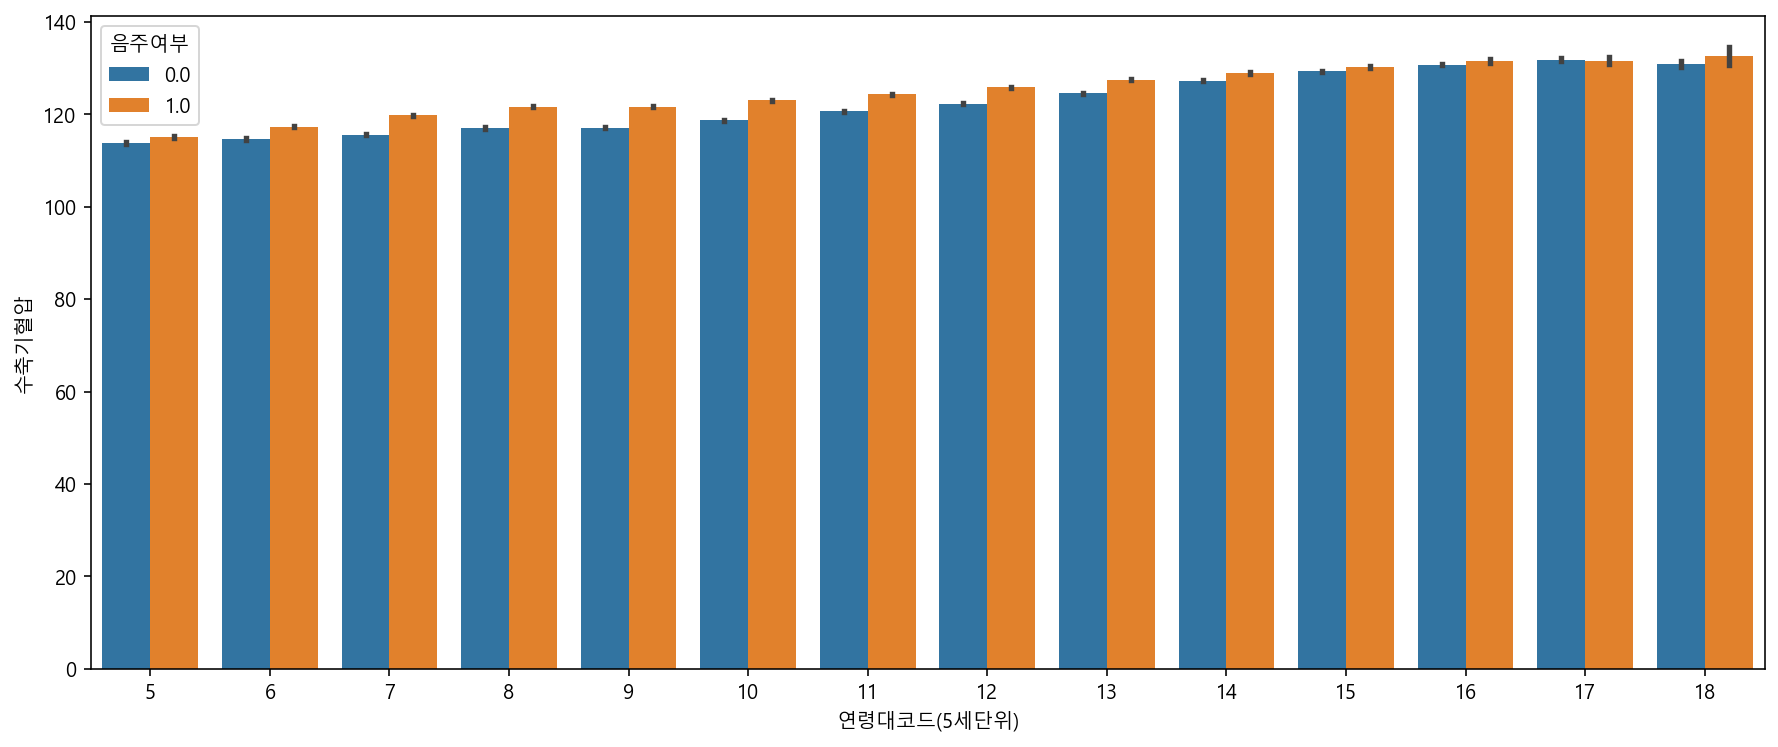

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='연령대코드(5세단위)', y='수축기혈압', hue='음주여부')

<Figure size 1080x432 with 0 Axes>

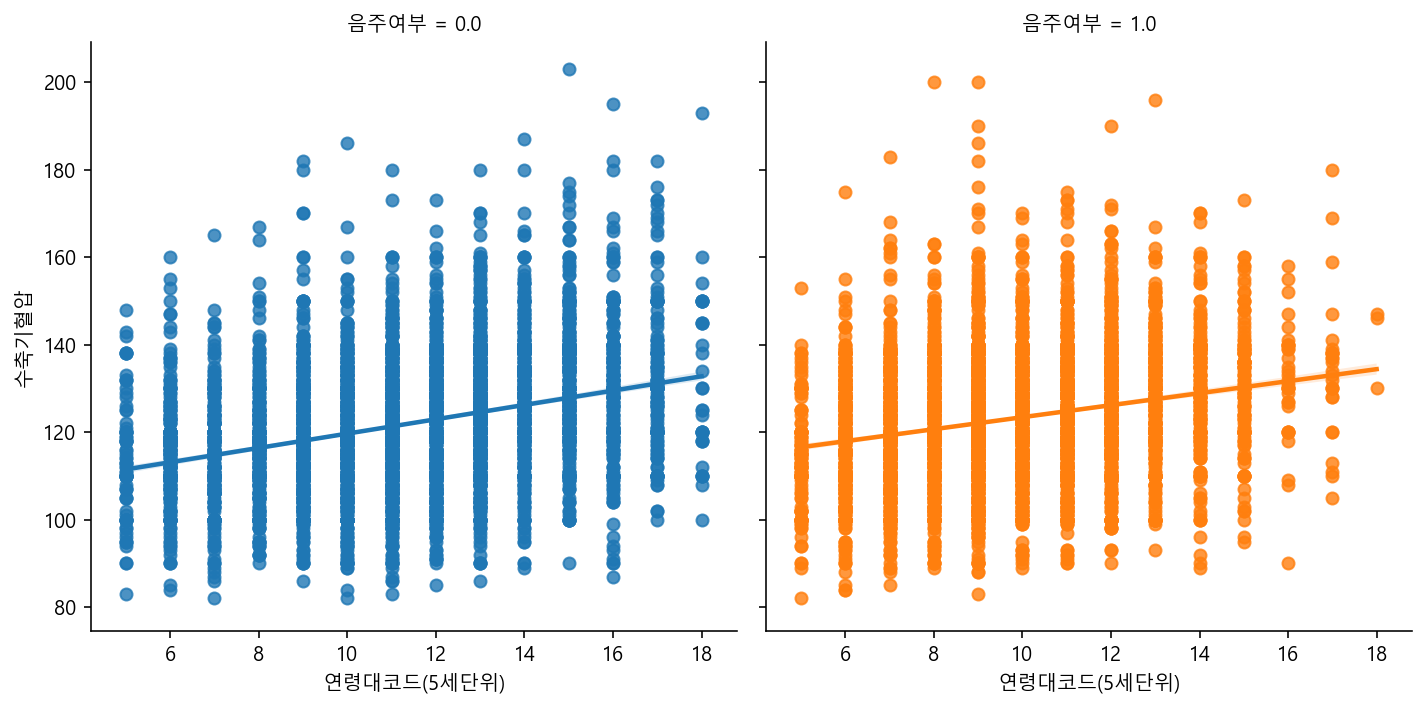

In [58]:
plt.figure(figsize=(15,6))
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='수축기혈압', hue='음주여부', col='음주여부')

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='수축기혈압', hue='음주여부', col='음주여부')

In [ ]:
# 생각보다 음주나 술이 혈압에 큰 영향을 주는 것 같지는 않다.

# 술이나 담배를 하면 총콜레스테롤이 높을까?

In [59]:
df_corr = df_sample.corr()

In [62]:
df_corr['음주여부'].sort_values(ascending=False)

음주여부           1.000000
신장(5Cm단위)      0.383492
흡연상태           0.366180
혈색소            0.302007
체중(5Kg단위)      0.281128
감마지티피          0.214272
허리둘레           0.136699
트리글리세라이드       0.120009
이완기혈압          0.102204
시력(우)          0.096071
시력(좌)          0.083274
구강검진수검여부       0.079285
혈청크레아티닌        0.063658
(혈청지오티)AST     0.056742
HDL콜레스테롤       0.039930
수축기혈압          0.039491
(혈청지오티)ALT     0.035040
식전혈당(공복혈당)     0.021006
총콜레스테롤         0.019622
요단백            0.004731
가입자일련번호       -0.014200
시도코드          -0.024617
LDL콜레스테롤      -0.040385
청력(좌)         -0.049861
청력(우)         -0.052320
연령대코드(5세단위)   -0.287374
성별코드          -0.376458
기준년도                NaN
데이터공개일자             NaN
Name: 음주여부, dtype: float64

In [63]:
df_corr['흡연상태'].sort_values(ascending=False)

흡연상태           1.000000
신장(5Cm단위)      0.469452
혈색소            0.441364
음주여부           0.366180
체중(5Kg단위)      0.366075
허리둘레           0.250381
감마지티피          0.237647
트리글리세라이드       0.222356
혈청크레아티닌        0.161633
이완기혈압          0.123781
식전혈당(공복혈당)     0.098530
수축기혈압          0.086719
시력(우)          0.075086
(혈청지오티)AST     0.074392
시력(좌)          0.067379
구강검진수검여부       0.050782
요단백            0.036005
(혈청지오티)ALT     0.035574
시도코드           0.020226
총콜레스테롤        -0.002342
가입자일련번호       -0.009085
청력(좌)         -0.018636
청력(우)         -0.018710
LDL콜레스테롤      -0.024080
연령대코드(5세단위)   -0.129548
HDL콜레스테롤      -0.195014
성별코드          -0.588632
기준년도                NaN
데이터공개일자             NaN
Name: 흡연상태, dtype: float64

In [64]:
import numpy as np

In [65]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,

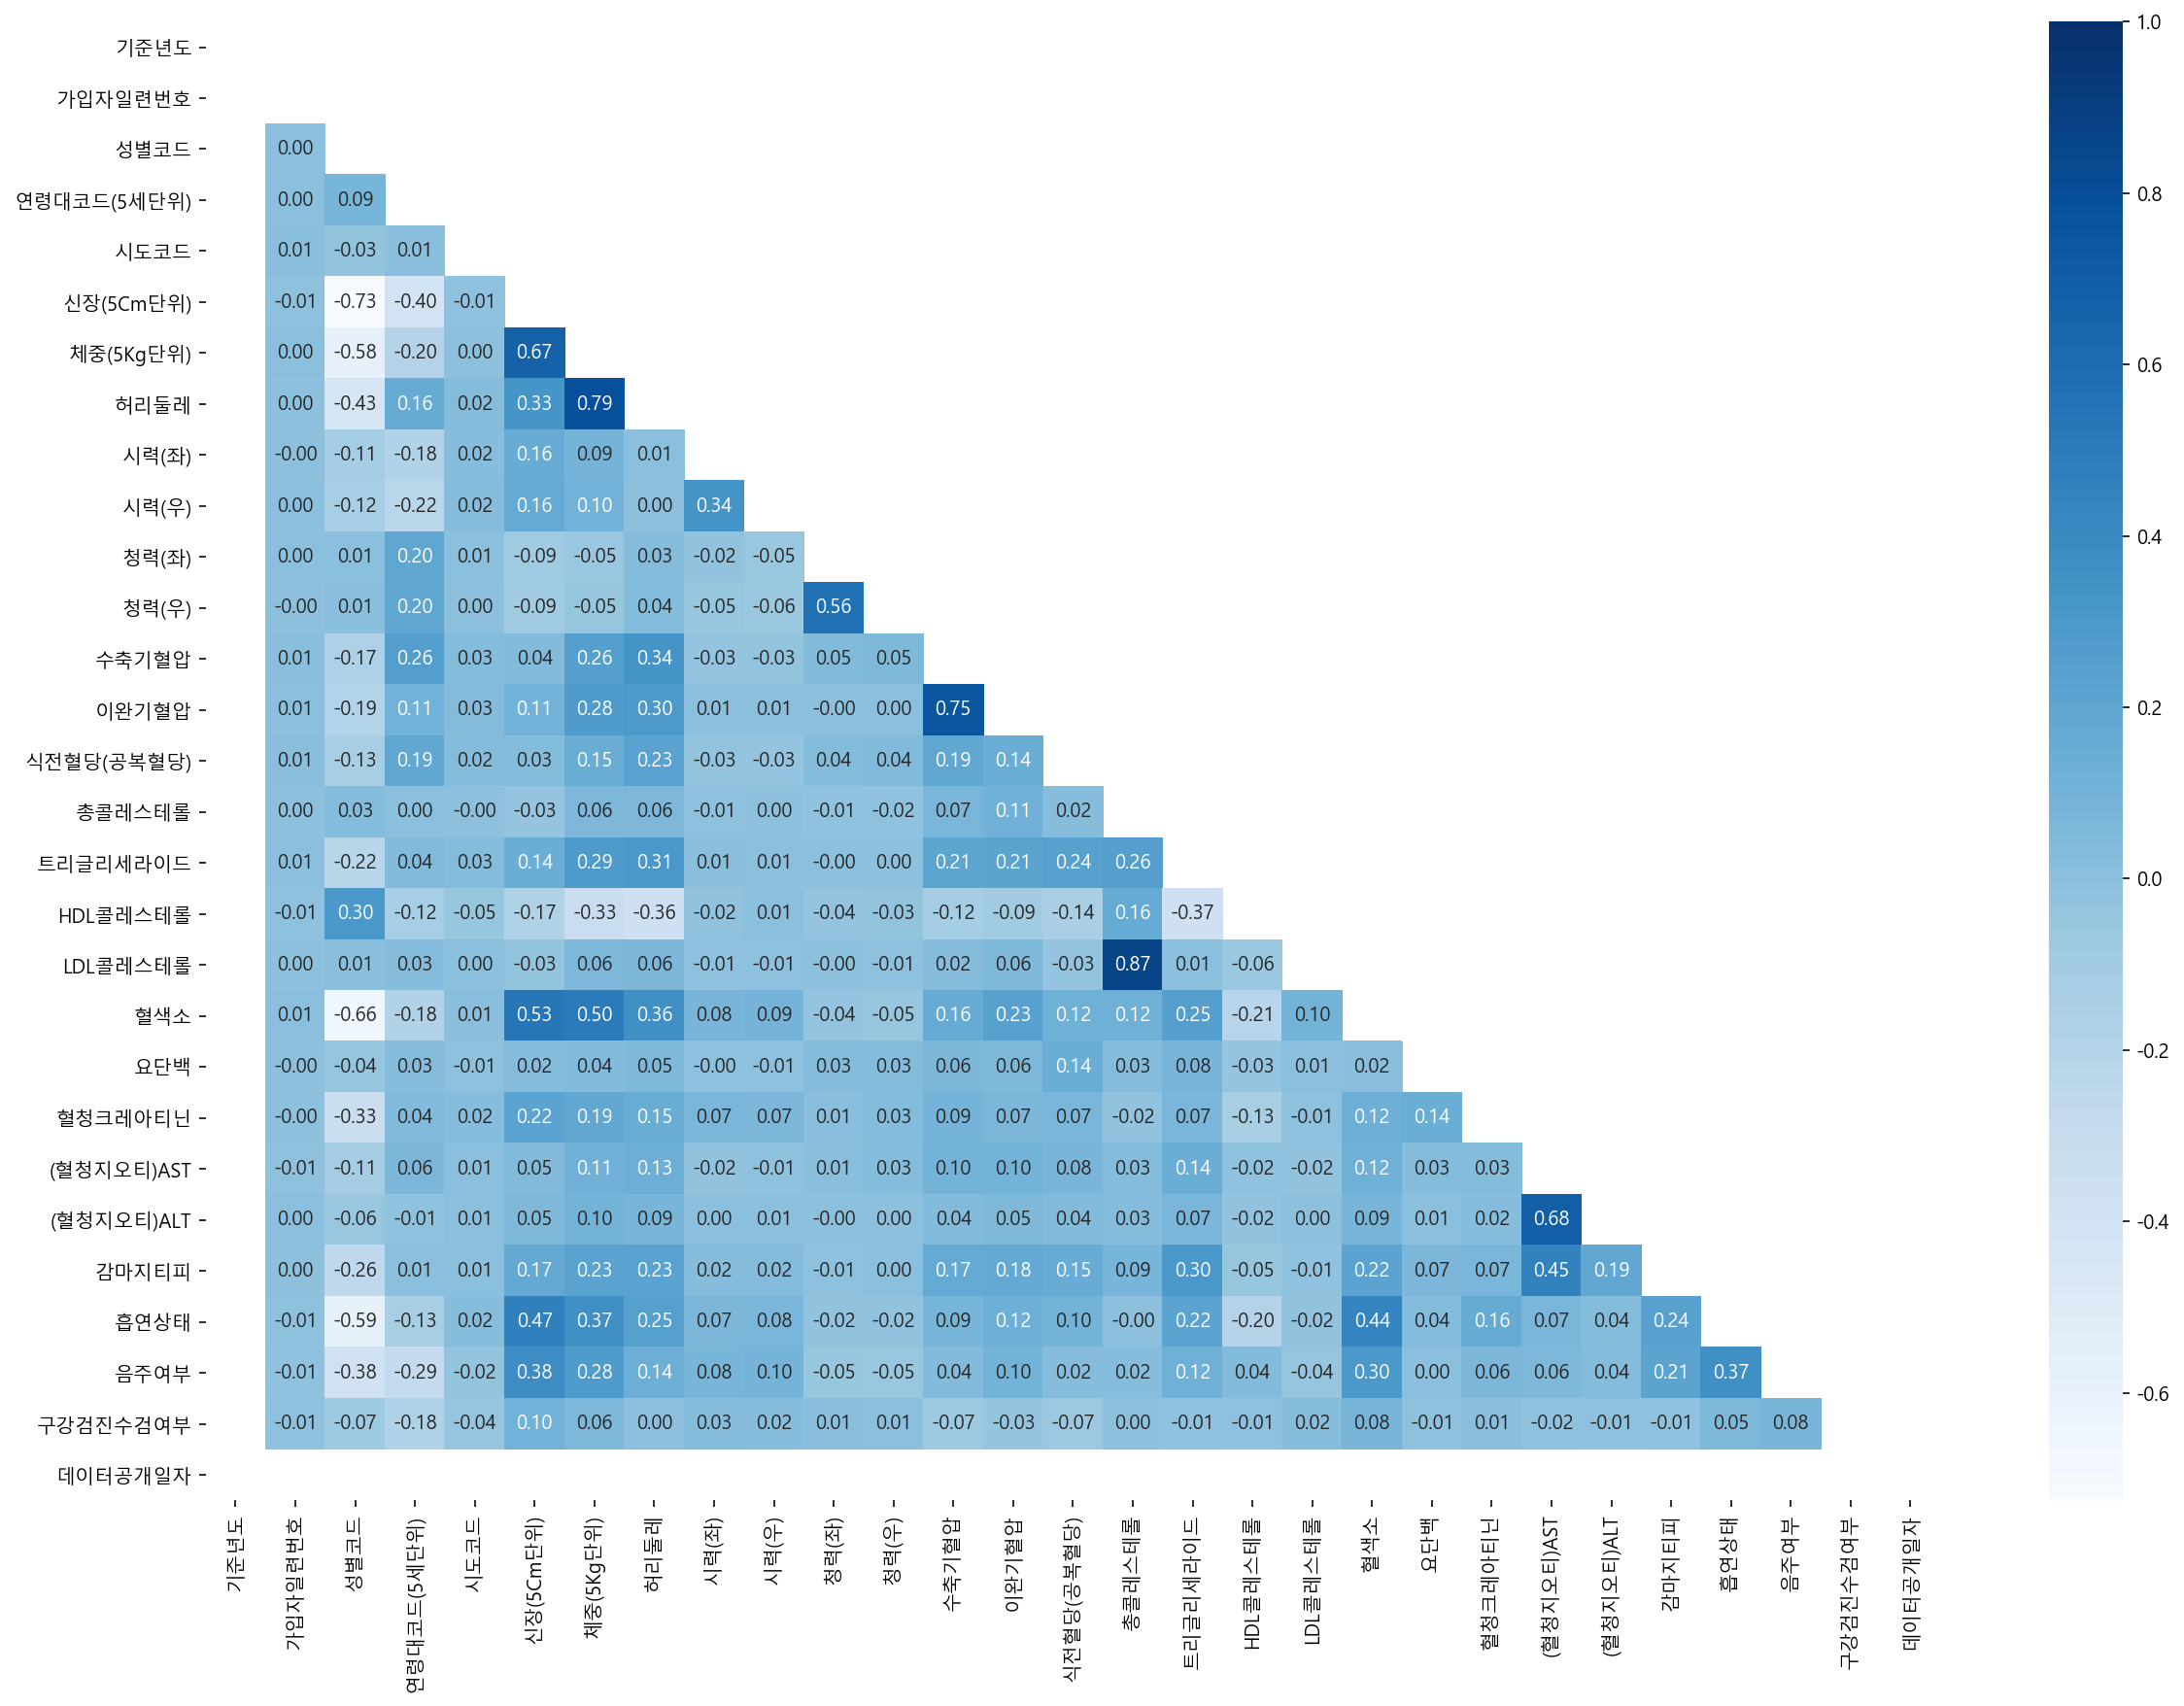

In [67]:
plt.figure(figsize=(20,14))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues', mask=mask)

In [ ]:
# 생각보다 술이나 담배가 건강에 직접적인 영향을 주는 것 같지는 않다. 혈색소 수치를 제외하고는 그렇게 큰 상관관계를 보여주고 있지 않다.
# 오히려 술이나 담배는 신장과 체중과 상관관계가 유의미하고, 흡연을 하면 담배를 피는 경우가 많다.